In [1]:
# biblioteca para manipulação de dados
import pandas as pd

# biblioteca para computação numérica
import numpy as np

# biblioteca para construção de gráficos
import matplotlib.pyplot as plt

# biblioteca para carregar os dados do dataset
from sklearn.datasets import load_boston

# biblioteca para separar os dados em treino e teste
from sklearn.model_selection import train_test_split

# biblioteca para usar o modelo Support Vector Regression
from sklearn.svm import SVR

# biblioteca para calcular uma métrica do modelo
from sklearn.metrics import r2_score 

In [2]:
# plota o gráfico histograma
def plt_hist(df, coluna, title):
  """
    Plota um histograma

    input 
      df: dataframe
      coluna: Coluna para ser plotada
      title: título do gráfico
  """
  plt.figure(figsize=(12,8))
  plt.title(title, fontsize=18)
  plt.xlabel(coluna, fontsize=16)
  plt.ylabel("Frequência", fontsize=16)
  
  plt.hist(df[coluna])

  plt.show()

In [3]:
# carregando o dataset "Boston house prices"
data = load_boston()
dataset = pd.DataFrame(data['data'], columns=data['feature_names'])
dataset['target'] = data['target']

# visualizando os primeiros valores
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


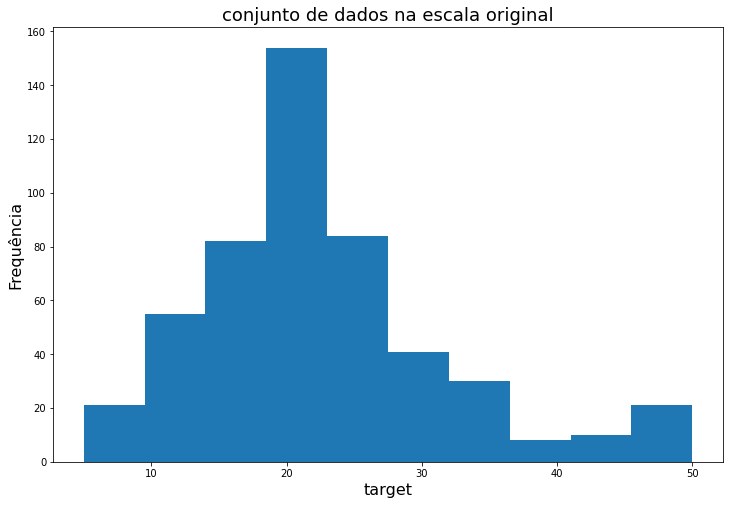

In [4]:
plt_hist(dataset, "target", "conjunto de dados na escala original")

In [5]:
colunas = dataset.columns

In [6]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler() 
dataset_padronizado = pd.DataFrame(scaler_standard.fit_transform(dataset), columns=colunas)
dataset_padronizado.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


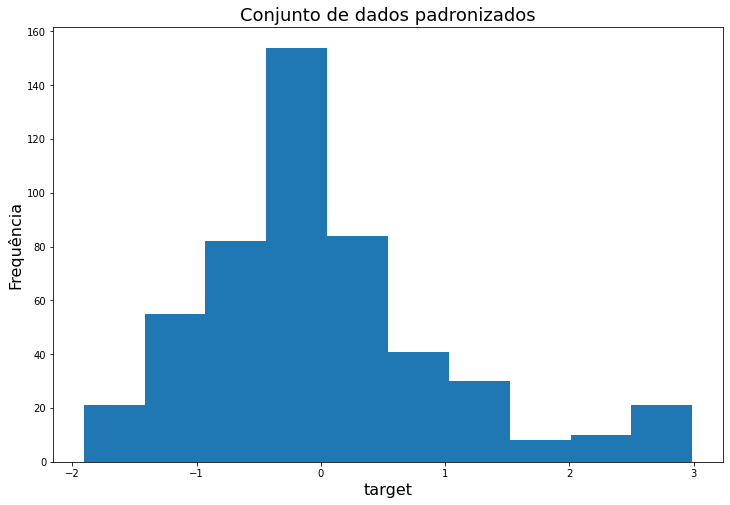

In [7]:
plt_hist(dataset_padronizado, "target", "Conjunto de dados padronizados")

In [8]:
# normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler_minMax = MinMaxScaler() 
data_normalize = pd.DataFrame(scaler_minMax.fit_transform(dataset), columns=colunas)
data_normalize.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


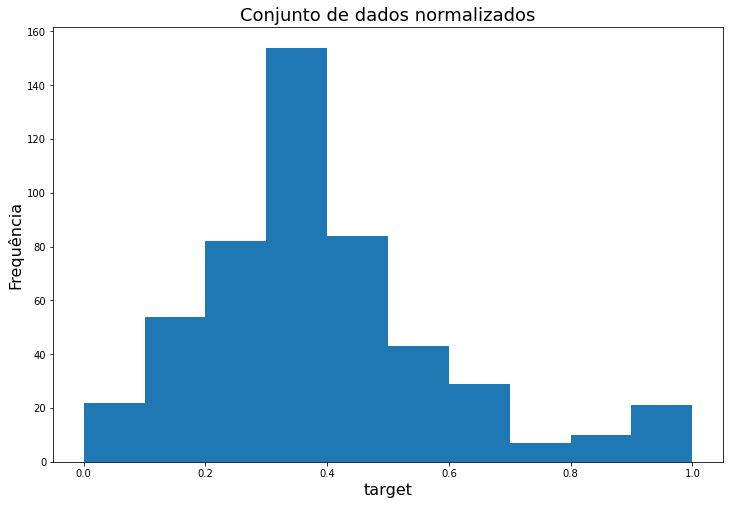

In [9]:
plt_hist(data_normalize, "target", "Conjunto de dados normalizados")

In [10]:
def ML_step(data):
  '''
    Realiza split dos dados, o treino e a avaliação do modelo

    input
      data: conjunto de dados para treino
  '''
  dataset_num_columns = data.shape[1]
  x = data.iloc[:, 0:dataset_num_columns-1]
  y = data['target']

  # separando em dados de treino e teste 
  X_train, X_test, y_train, y_test = train_test_split(x, 
                                                      y, 
                                                      test_size=0.30, 
                                                      random_state=12)
  
  # instanciando o modelo Support Vector Regression
  model = SVR()

  # treinando o modelo
  model.fit(X_train, y_train)

  # prevendo os valores
  y_predict = model.predict(X_test)

  # avaliando o modelo (quanto mais próximo de 1 melhor)
  print("r^2:", r2_score(y_test, y_predict))

In [11]:
print("Dataset não padronizado")
ML_step(dataset)

Dataset não padronizado
r^2: 0.1604256843627555


In [12]:
print("Dataset padronizado")
ML_step(dataset_padronizado)

Dataset padronizado
r^2: 0.8566091790160586


In [13]:
print("Dataset normalizado")
ML_step(data_normalize)

Dataset normalizado
r^2: 0.8355270748255403
